In [ ]:
# 출처: https://datascienceschool.net/02%20mathematics/07.05%20%EA%B3%B5%EB%B6%84%EC%82%B0%EA%B3%BC%20%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98.html

In [ ]:
# 평균, 분산의 개념 : https://destrudo.tistory.com/15
# 확률변수X가 있을때 우리가 흔히 이 분포를 나타낼때 쓰는것이 첫번째로 평균이고 두번째로 분산이다.
# 평균으로써 분포의 중간부분을 알아내고, 분산으로써 분포가 얼마나 퍼져있는지 알아낸다.

# 그렇다면 확률변수가 2가지일때 이 확률분포들이 어떤모양으로 되어있는지를 알고싶을때, 가장 먼저 X의 평균, 다음이 Y의 평균이다.
# 이렇게 되면 대충 분포가 어디에 주로 모여있는지 (m_x, m_y)가 나온다.
# 그다음으로 궁금한게 얼마나 퍼져있는지 인데 그것은 확률변수의 분산을 구하면 되지만 
# 각 확률변수들이 어떻게 퍼져있는지를 나타내는 것이 **공분산(Covariance)이다.**

# 두 확률변수 X와 Y가 어떤 모양으로 퍼져있는지 즉, X가 커지면 Y도 커지거나 혹은 작아지거나 아니면 별 상관 없거나 등을 나타내어 주는 것이다.

다변수 확률변수 간의 상관 관계를 숫자로 나타낸 것이 공분산(covariance)과 상관계수(correlation coefficient)다.  

# 표본공분산
표본공분산(sample covariance)은 다음처럼 정의한다. 여기에서 xi와 yi는 각각 i번째의 x 자료와 y자료의 값을 가리키고, x¯와 y¯는 x 자료와 y자료의 표본평균을 가리킨다.  
\begin{align}
s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y})
\tag{7.5.1}
\end{align}
  
표본분산과 마찬가지로 표본공분산도 자료가 평균값으로부터 얼마나 떨어져 있는지를 나타낸 것이다. 
  
# 표본상관계수
표본공분산은 평균을 중심으로 각 자료들이 어떻게 분포되어 있는지 크기와 방향성을 같이 보여준다. 그런데 분포의 크기는 공분산이 아닌 분산만으로도 알 수 있기 때문에 대부분의 경우 자료 분포의 방향성만 분리하여 보는 것이 유용하다. 이 때 필요한 것이 **표본상관계수(sample correlation coefficient)**다.  
표본상관계수는 다음과 같이 공분산을 각각의 표본표준편차값으로 나누어 정규화(normalize)하여 정의한다.  
\begin{align}
r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}}
\tag{7.5.2}
\end{align}

이와 다르게 정의한 상관계수도 있기 때문에 다른 종류의 상관계수와 비교하여 말하는 경우에는 피어슨(Pearson) 상관계수라고 하기도 한다.  
<br>
사이파이의 stats 서브패키지는 피어슨 상관계수를 계산하는 pearsonr() 함수를 제공한다. pearsonr() 함수는 상관계수와 유의확률을 반환한다.  
유의확률에 대해서는 9장에서 공부한다.  

In [6]:
# 다음 코드는 붓꽃의 꽃받침의 길이와 꽃잎의 길이 사이의 상관계수를 계산하는 코드다. 상관계수가 약 0.87임을 알 수 있다.
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
print(x1.shape, ' ,X1:',x1)
print(x3.shape, ' ,X3:',x3)

import scipy as sp
print(sp.stats.pearsonr(x1, x3)[0])

(150,)  ,X1: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
(150,)  ,X3: [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.

# 확률변수의 공분산과 상관계수
두 확률변수 X와 Y의 공분산은 기댓값 연산자를 사용하여 다음과 같이 정의된다.  
\begin{align}
\text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\tag{7.5.3}
\end{align}
  
마찬가지로 두 확률변수 X와 Y의 상관 계수도 다음과 같이 정의한다.  
\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{Var}[X] \cdot \text{Var}[Y]}}
\tag{7.5.4}
\end{align}
  
확률변수의 상관계수는 다음과 같은 성질을 가진다.  
\begin{align}
-1 \leq \rho \leq 1
\tag{7.5.5}
\end{align}
  
또한 ρ가 -1, 0, 1인 경우를 각각 다음과 같이 부른다.  
ρ=1 : 완전선형 상관관계  
ρ=0 : 무상관 (독립과는 다름)  
ρ=−1 : 완전선형 반상관관계  
  
이 상관계수의 부호와 크기가 의미하는 바는 다음 스캐터 플롯에서 알 수 있다.   
이 스캐터 플롯은 특정한 상관계수를 가지는 데이터를 시뮬레이션을 통해 그린 것이다.   
스캐터 플롯의 위에 쓰여진 숫자는 시뮬레이션에 사용된 상관계수를 나타낸다.   
스캐터 플롯의 데이터가 양의 기울기를 가지는 직선 혹은 타원 모양을 가지면 상관계수는 양수이고 음의 기울기를 가지는 직선 혹은 타원 모양이 되면 상관계수가 음이 된다.   
또한 직선 모양이 뚜렷할수록 상관계수의 절대값이 커지고 원에 가까워질 수록 절대값이 작아진다.  


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_

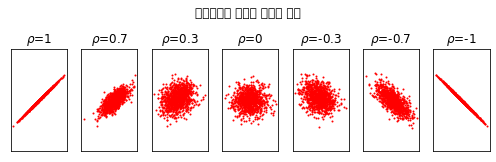

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$\rho$={}".format(r))

plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_

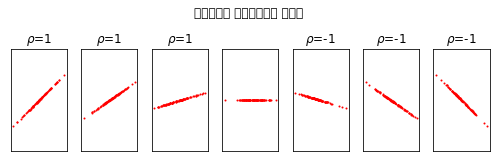

In [4]:
# 또한 상관계수는 스캐터 플롯의 기울기와는 아무런 상관이 없다.
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 2))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(r"$\rho$=1")
    if s < 0:
        plt.title(r"$\rho$=-1")

plt.suptitle("상관계수와 스케터플롯의 기울기", y=1.1)
plt.tight_layout()
plt.show()

# 비선형 상관관계
두 확률변수가 상관관계가 있으면 두 확률변수의 값 중 하나를 알았을 때 다른 확률변수의 값에 대한 정보를 알 수 있다.   
반드시 정확한 값을 알 수 있어야 하는 것은 아니다. 따라서 다음과 같은 경우도 상관관계가 있는 데이터라고 할 수 있다.   
선형이 아닌 상관관계를 비선형 상관관계라고 한다.   
**피어슨 상관계수**는 두 확률변수의 관계가 선형적일 때만 상관관계를 제대로 계산할 수 있다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=

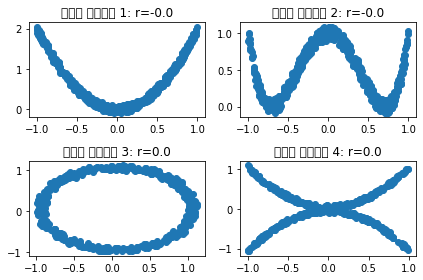

In [7]:
# 다음 네가지 데이터는 모두 x의 값으로부터 y값을 알 수 있기 때문에 상관관계를 가지고 있다. 
# 하지만 피어슨 상관계수는 모두 0으로 계산된다.
n = 500
np.random.seed(1)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"비선형 상관관계 1: r={:3.1f}".format(r1))
plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"비선형 상관관계 2: r={:3.1f}".format(r2))
plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r"비선형 상관관계 3: r={:3.1f}".format(r3))
plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n)) * \
    np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r"비선형 상관관계 4: r={:3.1f}".format(r4))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

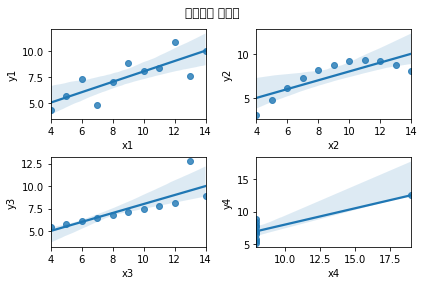

In [11]:
# 앤스콤 데이터
# 상관계수로 분포의 형상을 추측할 때 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점에 유의해야 한다. 
# 다음은 프랭크 앤스콤(Frank Anscombe)의 논문에 예시된 데이터다. 
# 이 데이터는 서로 다른 4종류의 2차원 데이터셋을 포함하는데 4종류 데이터셋 모두 상관계수가 약 0.816로 동일하다.
import statsmodels.api as sm
data = sm.datasets.get_rdataset("anscombe")
df = data.data
df[["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]]

#세번째 데이터셋과 네번째 데이터셋에서 볼 수 있듯이 
# 나머지 데이터의 상관계수가 1 또는 0인 경우에도 단 하나의 특이값(outlier) 자료에 의해 상관계수가 크게 달라질 수 있다.
import seaborn as sns 

plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("앤스콤의 데이터")
plt.show()

In [ ]:
# 다변수 확률변수의 표본공분산

In [ ]:
# 다변수 확률변수의 공분산